鈴木讓「統計的機械学習の数理 with Python 100問」(共立出版)

# 第4章 情報量基準

## 4.1 情報量規準

In [1]:
pip install japanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

In [3]:
# Anacondaの場合は下記( import japanize_matplotlib はコメントアウト)
import matplotlib
from matplotlib import font_manager
matplotlib.rc("font", family="BIZ UDGothic")

In [4]:
from sklearn.linear_model import LinearRegression
import itertools  # 組合わせを列挙する

In [5]:
res = LinearRegression()

In [6]:
def rss_min(X, y, T):
    s_min = np.inf
    m = len(T)
    for j in range(m):
        q = T[j]
        res.fit(X[:, q], y)
        y_hat = res.predict(X[:, q])
        S = np.linalg.norm(y_hat - y) ** 2
        if S < s_min:
            s_min = S
            set_q = q
    return s_min, set_q

In [7]:
boston = np.loadtxt("boston.txt", delimiter="\t")
X = boston[:, [0, 2, 4, 5, 6, 7, 9, 10, 11, 12]]
y = boston[:, 13]

In [8]:
n, p = X.shape
aic_min = np.inf
for k in range(1, p + 1):
    T = list(itertools.combinations(range(p), k))
    s_min, set_q = rss_min(X, y, T)
    aic = n * np.log(s_min / n) + 2 * k
    if aic < aic_min:
        aic_min = aic
        set_min = set_q
print(aic_min, set_min)

1619.7876085566147 (0, 2, 3, 5, 7, 8, 9)


In [9]:
y_bar = np.mean(y)
tss = np.linalg.norm(y - y_bar) ** 2

d_max = -np.inf
for k in range(1, p + 1):
    T = list(itertools.combinations(range(p), k))
    s_min, set_q = rss_min(X, y, T)
    d = 1 - (s_min / (n - k - 1)) / (tss / (n - 1))
    if d > d_max:
        d_max = d
        set_max = set_q
print(d_max, set_max)

0.7130213433266738 (0, 2, 3, 5, 7, 8, 9)


In [10]:
def ic(X, y, k):
    n, p = X.shape
    T = list(itertools.combinations(range(p), k))
    S, set_q = rss_min(X, y, T)
    aic = n * np.log(S / n) + 2 * k
    bic = n * np.log(S / n) + k * np.log(n)
    return {'AIC': aic, 'BIC': bic}

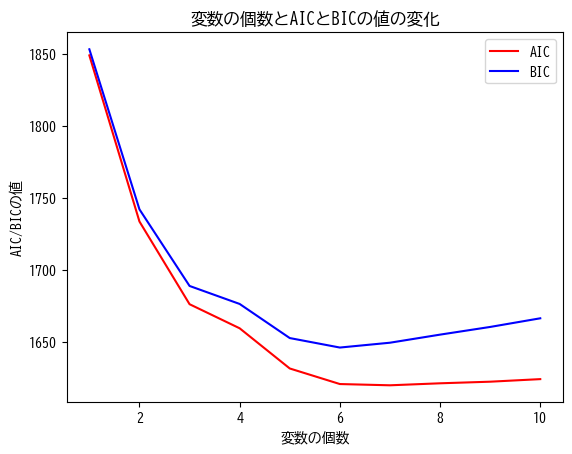

In [11]:
aic_seq = []
bic_seq = []
for k in range(1, p + 1):
    aic_seq.append(ic(X, y, k)['AIC'])
    bic_seq.append(ic(X, y, k)['BIC'])

x_seq = np.arange(1, p + 1)

plt.plot(x_seq, aic_seq, c="red", label="AIC")
plt.plot(x_seq, bic_seq, c="blue", label="BIC")
plt.xlabel("変数の個数")
plt.ylabel("AIC/BICの値")
plt.title("変数の個数とAICとBICの値の変化")
plt.legend()
plt.show()

## 4.2 有効推定量とFisher情報量行列

## 4.3 Kullback-Leibler 情報量

## 4.4 赤池の情報量規準(AIC)の導出